In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from ch_3_metrics import *

In [2]:
auto_data = pd.read_csv('data/auto.csv')

In [3]:
X = auto_data['horsepower'].to_numpy()
y = auto_data['mpg'].to_numpy()

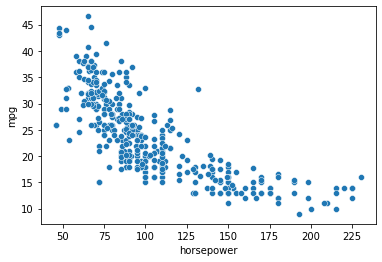

In [4]:
sns.scatterplot(
    data=auto_data,
    x='horsepower',
    y='mpg'
)
plt.show()

In [5]:
X = sm.add_constant(X)
linear_model = sm.OLS(endog=y, exog=X)
lm_results = linear_model.fit()

rse, r_squared, f_statistic = get_metrics(lm_results)
print(lm_results.summary().tables[1])
display_metrics(rse, r_squared, f_statistic)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
x1            -0.1578      0.006    -24.489      0.000      -0.171      -0.145
Residual Standard Error: 4.905757
R Squared: 0.605948
F Statistic: 599.717741



In [6]:
X_pred_min, X_pred_max = X[:, 1].min() - 10, X.max() + 10
X_pred = np.linspace(X_pred_min, X_pred_max, 10)
X_pred = sm.add_constant(X_pred)

y_pred = lm_results.predict(X_pred)

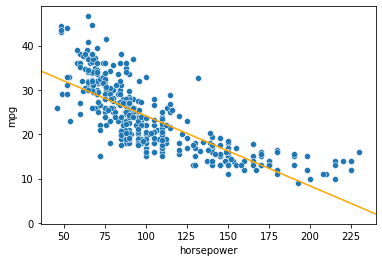

In [10]:
sns.scatterplot(
    data=auto_data,
    x='horsepower',
    y='mpg'
)
plt.plot(X_pred[:, 1], y_pred, color='orange')
plt.xlim(X_pred_min, X_pred_max)
plt.show()